# Data cleaning for museum objects

We only want certain kinds of items from the Harvard Art Museums that fit well with our application. For example, the Art Museums seem to have a large collection of images of coins, and those don't really fit well with CLIP, so we filter them out in this step.

Other objects have no images, which make them not useful. Let's explore what these images look like!

In [1]:
%pip install inline-sql
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

  Using cached inline_sql-0.1.0-py3-none-any.whl (5.1 kB)
  Using cached duckdb-0.5.1-cp38-cp38-win_amd64.whl (11.6 MB)
  Using cached pandas-1.3.5-cp38-cp38-win_amd64.whl (10.2 MB)
  Using cached sqlparse-0.4.3-py3-none-any.whl (42 kB)
  Using cached pytz-2022.6-py2.py3-none-any.whl (498 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Developer_Zaid\disart\backend\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import json

with open("../data/artmuseums.json", "r") as f:
    dataset = json.load(f)

In [3]:
len(dataset)

231500

In [4]:
dataset[0]

{'copyright': None,
 'contextualtextcount': 0,
 'creditline': 'Harvard Art Museums/Arthur M. Sackler Museum, Loan from the Trustees of the Arthur Stone Dewing Greek Numismatic Foundation',
 'accesslevel': 1,
 'dateoflastpageview': '2020-11-25',
 'classificationid': 50,
 'division': 'Asian and Mediterranean Art',
 'markscount': 0,
 'publicationcount': 0,
 'totaluniquepageviews': 7,
 'contact': 'am_asianmediterranean@harvard.edu',
 'colorcount': 4,
 'rank': 1003,
 'details': {'coins': {'reverseinscription': None,
   'dieaxis': '8',
   'metal': 'AR',
   'obverseinscription': None,
   'denomination': 'litra',
   'dateonobject': None}},
 'state': None,
 'id': 189263,
 'verificationleveldescription': 'Good. Object is well described and information is vetted',
 'period': 'Classical period, Early',
 'images': [{'date': '2004-06-03',
   'copyright': 'President and Fellows of Harvard College',
   'imageid': 38027,
   'idsid': 18778012,
   'format': 'image/jpeg',
   'description': None,
   'techn

In [5]:
sum(["primaryimageurl" not in item for item in dataset])

22679

In [6]:
len(set([item["primaryimageurl"] for item in dataset if "primaryimageurl" in item]))

206451

In [7]:
210681 + 22994

233675

In [8]:
len(dataset)

231500

Okay, it looks like about 10% of the items in the dataset don't have any image associated with them. Furthermore, there are 3000 image URLs that are duplicated. Let's look at some of these duplicates.

In [9]:
from collections import Counter

Counter([item["primaryimageurl"] for item in dataset if "primaryimageurl" in item]).most_common(40)

[('https://nrs.harvard.edu/urn-3:HUAM:INV180154_dynmc', 48),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV180030_dynmc', 38),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV180019_dynmc', 36),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV180031_dynmc', 34),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV180197_dynmc', 32),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV180165_dynmc', 28),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV180032_dynmc', 27),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV186007_dynmc', 26),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV180113_dynmc', 25),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV180100_dynmc', 25),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV180157_dynmc', 23),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV179871_dynmc', 23),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV180153_dynmc', 23),
 ('https://nrs.harvard.edu/urn-3:HUAM:VRS35829_dynmc', 22),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV141481_dynmc', 22),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV180155_dynmc', 22),
 ('https://nrs.harvard.ed

Okay, looks like all of the coins have dimensions in grams. The weird print also has a `None` dimension. Maybe for now I'll just filter for all items that have an image and some 2D dimensions.

In [10]:
import random

random.seed(42)

shuffled_dataset = list(dataset)
random.shuffle(shuffled_dataset)

[item["dimensions"] for item in shuffled_dataset[:100]]

['image: 9.5 x 12 cm (3 3/4 x 4 3/4 in.)',
 'image: 12.7 x 10.16 cm (5 x 4 in.)',
 '10.16 x 12.7 cm (4 x 5 in.)',
 '16.3 x 8.2 x 1.2 cm (6 7/16 x 3 1/4 x 1/2 in.)',
 None,
 'vertical ōban: H. 36.8 × W. 25.4 cm (14 1/2 × 10 in.)',
 'plate: 26.7 x 44.6 cm (10 1/2 x 17 9/16 in.)',
 'sheet: 111.3 x 88.6 cm (43 13/16 x 34 7/8 in.)',
 '24.13 x 15.24 cm (9 1/2 x 6 in.)',
 None,
 '98.5 x 55 x 3.5 cm (38 3/4 x 21 5/8 x 1 3/8 in.)',
 '10.3 x 11.1 cm (4 1/16 x 4 3/8 in.)',
 '8.46 g',
 '21.5 x 28 cm (8 7/16 x 11 in.)',
 '6 x 19 cm (2 3/8 x 7 1/2 in.)',
 '3.03 g',
 'plate: 28.9 x 45.6 cm (11 3/8 x 17 15/16 in.)',
 '60.5 x 49.5 cm (23 13/16 x 19 1/2 in.)',
 '36.2 x 132.72 cm (14 1/4 x 52 1/4 in.)',
 'image: 17.5 x 24.2 cm (6 7/8 x 9 1/2 in.)',
 '2.4 x 3.6 cm (15/16 x 1 7/16 in.)',
 'image: 20.7 x 15.8 cm (8 1/8 x 6 1/4 in.)',
 '2.5 x 3.5 cm (1 x 1 3/8 in.)',
 'image: 18.1 x 23.9 cm (7 1/8 x 9 7/16 in.)\r\nsheet: 18.8 x 25.2 cm (7 3/8 x 9 15/16 in.)',
 '10.16 x 12.7 cm (4 x 5 in.)',
 '4.36 g',
 None,

In [11]:
import re

DIMS_RE = re.compile(r"([0-9]+\.?[0-9]*) ?x ?(?:W\.)? ?([0-9]+\.?[0-9]*) ?(?:x [0-9.]+)? ?cm", re.IGNORECASE)

In [12]:
[
    DIMS_RE.search(text) for text in (
        "2.89 g",
        "2.89 x 45.7 cm",
        "11.5 x 14.3 cm (4 1/2 x 5 5/8 in.)",
        "paper: H. 47.8 x W. 48.5 cm (18 13/16 x 19 1/8 in.)",
    )
]

[None,
 <re.Match object; span=(0, 14), match='2.89 x 45.7 cm'>,
 <re.Match object; span=(0, 14), match='11.5 x 14.3 cm'>,
 <re.Match object; span=(10, 27), match='47.8 x W. 48.5 cm'>]

In [13]:
dataset2 = []

for item in dataset:
    if item["dimensions"]:
        if matches := DIMS_RE.search(item["dimensions"]):
            height, width = float(matches.group(1)), float(matches.group(2))
            dataset2.append({**item, "dimheight": height, "dimwidth": width})

print(f"dataset2 has {len(dataset2)} items")

dataset2 has 137279 items


In [14]:
dataset2[0]

{'copyright': None,
 'contextualtextcount': 0,
 'creditline': 'Harvard Art Museums/Arthur M. Sackler Museum, Anonymous Loan in honor of Israel Goldman',
 'accesslevel': 1,
 'dateoflastpageview': '2022-10-02',
 'classificationid': 23,
 'division': 'Asian and Mediterranean Art',
 'markscount': 0,
 'publicationcount': 0,
 'totaluniquepageviews': 75,
 'contact': 'am_asianmediterranean@harvard.edu',
 'colorcount': 10,
 'rank': 3412,
 'state': None,
 'id': 211700,
 'verificationleveldescription': 'Adequate. Object is adequately described but information may not be vetted',
 'period': 'Edo period, 1615-1868',
 'images': [{'date': '2005-09-19',
   'copyright': 'President and Fellows of Harvard College',
   'imageid': 61812,
   'idsid': 18782938,
   'format': 'image/jpeg',
   'description': None,
   'technique': None,
   'renditionnumber': 'INV017540',
   'displayorder': 1,
   'baseimageurl': 'https://nrs.harvard.edu/urn-3:HUAM:INV017540_dynmc',
   'alttext': None,
   'width': 712,
   'publicca

In [15]:
from collections import Counter
Counter([item["primaryimageurl"] for item in dataset2 if "primaryimageurl" in item]).most_common(10)

[('https://nrs.harvard.edu/urn-3:HUAM:INV141481_dynmc', 22),
 ('https://nrs.harvard.edu/urn-3:HUAM:VRS35829_dynmc', 20),
 ('https://nrs.harvard.edu/urn-3:HUAM:767370', 18),
 ('https://nrs.harvard.edu/urn-3:HUAM:VRS33642_dynmc', 12),
 ('https://nrs.harvard.edu/urn-3:HUAM:VRS31249_dynmc', 12),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV203770_dynmc', 10),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV203772_dynmc', 10),
 ('https://nrs.harvard.edu/urn-3:HUAM:INV181639_dynmc', 9),
 ('https://nrs.harvard.edu/urn-3:HUAM:777226', 7),
 ('https://nrs.harvard.edu/urn-3:HUAM:777231', 7)]

In [16]:
Counter([item["techniqueid"] for item in dataset2]).most_common(10)

[(None, 39245),
 (123, 23067),
 (107, 16674),
 (777, 13963),
 (116, 6467),
 (220, 3178),
 (269, 3039),
 (127, 3005),
 (136, 2992),
 (110, 2826)]

Next, let's deduplicate items that have the same primary gallery image.

In [17]:
from dataclasses import dataclass
from typing import Optional

@dataclass
class Artwork:
    id: str
    objectnumber: str
    url: str
    image_url: str
    
    dimensions: str
    dimheight: float
    dimwidth: float

    title: Optional[str] # plaintext title
    description: Optional[str] # plaintext description
    labeltext: Optional[str] # optional label text
    people: list # information about artists
    dated: str # "c. 1950" or "1967-68" or "18th century"
    datebegin: int # numerical year or 0
    dateend: int # numerical year or 0
    century: Optional[str] # alternative to "dated" column

    department: str # categorical, about a dozen departments
    division: Optional[str] # modern, european/american, or asian/mediterranean
    culture: Optional[str] # American, Dutch, German, ...
    classification: str # Photographs or Prints or ...
    technique: Optional[str] # Lithograph, Etching, Gelatin silver print, ...
    medium: Optional[str] # Graphite on paper, Oil on canvas, ...

    accessionyear: Optional[int] # when the item was added
    verificationlevel: int # How verified a work is(?)
    totaluniquepageviews: int # a proxy for popularity
    totalpageviews: int # a proxy for popularity

    copyright: Optional[str] # copyright status
    creditline: str # who donated this artwork

dataset3 = []

seen_images = set()

for item in dataset2:
    image_url = item.get("primaryimageurl")
    if image_url is None or image_url in seen_images:
        continue
    seen_images.add(image_url)
    work = Artwork(
        id=item["id"],
        objectnumber=item["objectnumber"],
        url=item["url"],
        image_url=item["primaryimageurl"],
    
        dimensions=item["dimensions"],
        dimheight=item["dimheight"],
        dimwidth=item["dimwidth"],

        title=item.get("title"),
        description=item["description"],
        labeltext=item["labeltext"],
        people=item.get("people", []),
        dated=item["dated"],
        datebegin=max(item["datebegin"], 0),
        dateend=max(item["dateend"], 0),
        century=item["century"],

        department=item["department"],
        division=item["division"],
        culture=item["culture"],
        classification=item["classification"],
        technique=item["technique"],
        medium=item["medium"],

        accessionyear=item["accessionyear"],
        verificationlevel=item["verificationlevel"],
        totaluniquepageviews=item["totaluniquepageviews"],
        totalpageviews=item["totalpageviews"],

        copyright=item["copyright"],
        creditline=item["creditline"],
    )
    dataset3.append(work)

In [18]:
len(dataset3)

126499

In [19]:
dataset3[:10]

[Artwork(id=211700, objectnumber='1.1988.2', url='https://www.harvardartmuseums.org/collections/object/211700', image_url='https://nrs.harvard.edu/urn-3:HUAM:INV017540_dynmc', dimensions='H. 36.6 x W. 24.7 cm (14 7/16 x 9 3/4 in.) (paper)', dimheight=36.6, dimwidth=24.7, title='Sumida River Crossing (Sumidagawa watashiba no zu)', description='Center sheet of triptych: 1.1988.1 (right), 1.1988.2 (center), 1.1988.3 (left)', labeltext=None, people=[{'role': 'Artist', 'birthplace': None, 'gender': 'male', 'displaydate': '1798 - 1861', 'prefix': None, 'culture': 'Japanese', 'displayname': 'Utagawa Kuniyoshi 歌川国芳', 'alphasort': 'Utagawa, Kuniyoshi', 'name': 'Utagawa Kuniyoshi 歌川国芳', 'personid': 27019, 'deathplace': None, 'displayorder': 1}], dated='Late Edo period, circa 1847-1852', datebegin=1847, dateend=1852, century='19th century', department='Department of Asian Art', division='Asian and Mediterranean Art', culture='Japanese', classification='Prints', technique=None, medium='Woodblock p

In [20]:
import pandas as pd
from inline_sql import sql, sql_val

df = pd.DataFrame(dataset3)

In [21]:
df.columns

Index(['id', 'objectnumber', 'url', 'image_url', 'dimensions', 'dimheight',
       'dimwidth', 'title', 'description', 'labeltext', 'people', 'dated',
       'datebegin', 'dateend', 'century', 'department', 'division', 'culture',
       'classification', 'technique', 'medium', 'accessionyear',
       'verificationlevel', 'totaluniquepageviews', 'totalpageviews',
       'copyright', 'creditline'],
      dtype='object')

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

<AxesSubplot: xlabel='datebegin', ylabel='dateend'>

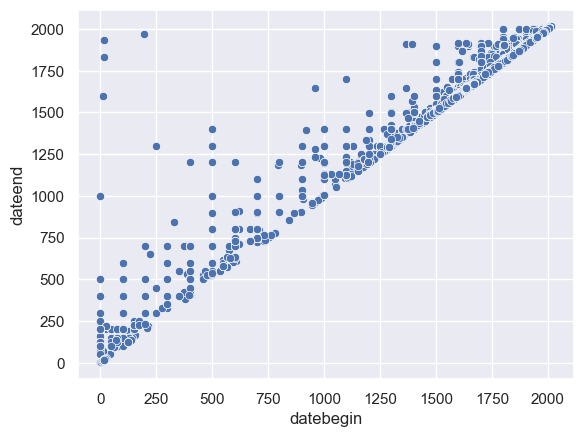

In [24]:
sns.scatterplot(x="datebegin", y="dateend",
                data=sql^ "SELECT datebegin, dateend FROM df WHERE LEAST(datebegin, dateend) > 0")

<AxesSubplot: xlabel='dimwidth', ylabel='dimheight'>

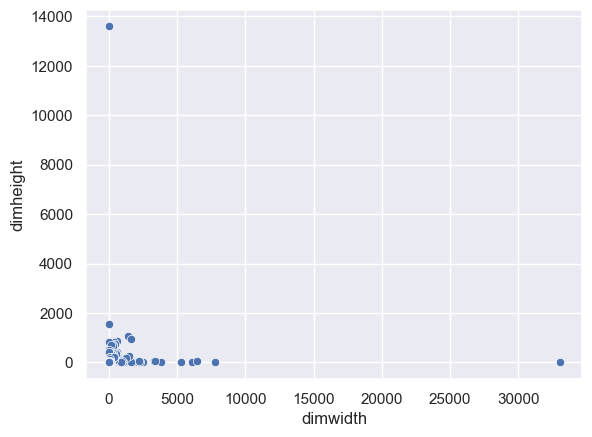

In [25]:
sns.scatterplot(x="dimwidth", y="dimheight", data=df)

In [26]:
sql^ "SELECT * FROM df WHERE dimwidth > 5000"

,id,objectnumber,url,image_url,dimensions,dimheight,dimwidth,title,description,labeltext,...,culture,classification,technique,medium,accessionyear,verificationlevel,totaluniquepageviews,totalpageviews,copyright,creditline
0,192423,1985.569,https://www.harvardartmuseums.org/collections/...,https://nrs.harvard.edu/urn-3:HUAM:INV019522_d...,33.6 x 5251.8 cm (13 1/4 x 2067 5/8 in.),33.60,5251.8,Illustrated Scroll of the Deity of Kifune Shri...,NaN,NaN,...,Japanese,Paintings,NaN,"Set of three large handscrolls; ink, color, go...",1985.0,0,38,48,NaN,"Harvard Art Museums/Arthur M. Sackler Museum, ..."
1,192399,1985.570,https://www.harvardartmuseums.org/collections/...,https://nrs.harvard.edu/urn-3:HUAM:INV006416_d...,32.8 x 6073.9 cm (12 15/16 x 2391 5/16 in.),32.80,6073.9,Annual Events in the Form of a Poetry Contest ...,NaN,NaN,...,Japanese,Paintings,NaN,"Handscrolls: five; ink, color, gold and silver...",1985.0,0,4,6,NaN,"Harvard Art Museums/Arthur M. Sackler Museum, ..."
2,192395,1985.702,https://www.harvardartmuseums.org/collections/...,https://nrs.harvard.edu/urn-3:HUAM:INV007068_d...,34.3 x 7757.2 cm (13 1/2 x 3054 in.),34.30,7757.2,Illustrated Story of the Priest Saigyō (Saigyō...,NaN,NaN,...,Japanese,Paintings,NaN,4 handscrolls; ink and light color on paper wi...,1985.0,0,97,126,NaN,"Harvard Art Museums/Arthur M. Sackler Museum, ..."
3,192477,1985.721,https://www.harvardartmuseums.org/collections/...,https://nrs.harvard.edu/urn-3:HUAM:INV006671_d...,42.5 x 6483.1 cm (16 3/4 x 2552 3/8 in.),42.50,6483.1,Illustrated Scroll of Birds (Chōrui zukan) in ...,NaN,NaN,...,Japanese,Paintings,NaN,Handscrolls: two; ink and color on paper,1985.0,0,25,28,NaN,"Harvard Art Museums/Arthur M. Sackler Museum, ..."
4,260628,M21485,https://www.harvardartmuseums.org/collections/...,https://nrs.harvard.edu/urn-3:HUAM:INV166184_d...,0.08 x 33038 cm (1/16 x 13007 1/16 in.),0.08,33038.0,Canto XII,NaN,NaN,...,American,Prints,Lithograph,NaN,1990.0,2,3,3,"© The Barnett Newman Foundation, New York / Ar...","Harvard Art Museums/Fogg Museum, Gift of Annal..."


In [27]:
sql^ "SELECT AVG(dimwidth), AVG(dimheight) FROM df"

,avg(dimwidth),avg(dimheight)
0,24.470711,22.206538


In [28]:
[
    sql_val^ "SELECT COUNT() FROM df WHERE dimheight > 200",
    sql_val^ "SELECT COUNT() FROM df WHERE dimwidth > 250",
]

[328, 270]

In [29]:
[
    sql_val^ "SELECT COUNT() FROM df WHERE dimheight < 1",
    sql_val^ "SELECT COUNT() FROM df WHERE dimwidth < 1",
]

[145, 190]

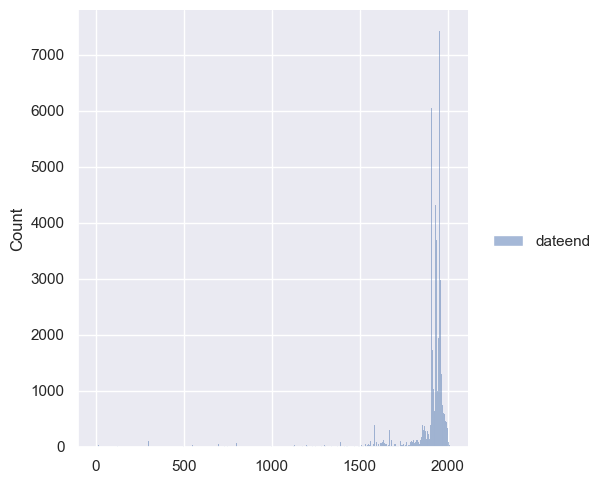

In [30]:
sns.displot(sql^ "SELECT dateend FROM df WHERE datebegin > 0")

In [31]:
df.describe()

,id,dimheight,dimwidth,datebegin,dateend,accessionyear,verificationlevel,totaluniquepageviews,totalpageviews
count,126499.000000,126499.000000,126499.000000,126499.000000,126499.000000,93611.000000,126499.000000,126499.000000,126499.000000
mean,182094.985241,22.206538,24.470711,1587.465925,1591.627847,1988.722725,2.628060,26.228935,32.233275
std,98950.039327,46.154439,109.629312,715.834921,716.875511,28.303498,0.872413,131.328136,159.694357
min,1412.000000,0.050000,0.060000,0.000000,0.000000,1765.000000,0.000000,0.000000,0.000000
25%,126097.500000,8.500000,9.600000,1839.000000,1849.000000,1967.000000,2.000000,1.000000,1.000000
50%,168913.000000,16.100000,17.800000,1930.000000,1931.000000,2003.000000,3.000000,4.000000,5.000000
75%,281071.500000,27.900000,27.300000,1946.000000,1955.000000,2011.000000,3.000000,17.000000,21.000000
max,374745.000000,13589.000000,33038.000000,2015.000000,2015.000000,2022.000000,4.000000,12016.000000,13593.000000


<AxesSubplot: xlabel='verificationlevel', ylabel='count'>

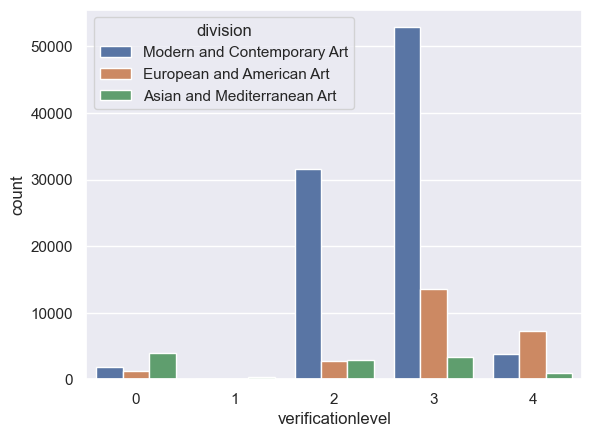

In [32]:
sns.barplot(x="verificationlevel", y="count", hue="division",
            data=sql^ "SELECT verificationlevel, division, COUNT() AS count FROM df GROUP BY 1, 2")

In [33]:
dataset4 = [Artwork(*row) for _, row in (sql^ """
    SELECT * FROM df
    WHERE dimheight >= 1 AND dimheight <= 200
    AND dimwidth >= 1 AND dimwidth <= 250
""").iterrows()]

In [34]:
len(dataset4)

125694

In [35]:
df4 = pd.DataFrame(dataset4)

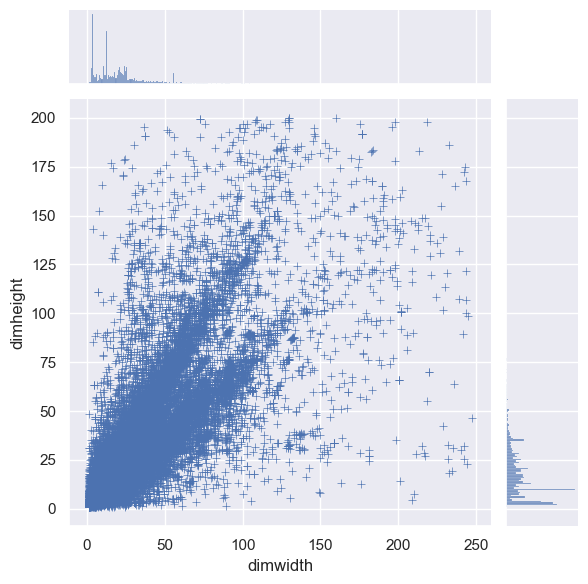

In [36]:
sns.jointplot(x="dimwidth", y="dimheight", marker="+", data=df4)

d:\Developer_Zaid\disart\backend\env\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


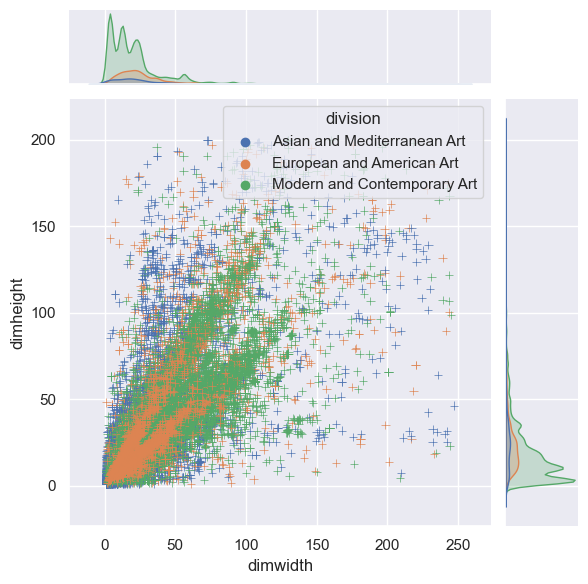

In [37]:
sns.jointplot(x="dimwidth", y="dimheight", hue="division", marker="+", data=df4)

In [38]:
df4.medium.value_counts()[:15]

Graphite on paper                           2863
Oil on canvas                               1872
Graphite on off-white wove paper            1429
Black crayon on paper                       1021
Gelatin silver print on card                 870
Ink, opaque watercolor and gold on paper     728
Gelatin silver print                         632
Terracotta                                   576
Bronze                                       535
Black ink on tan wove paper                  419
Plaster                                      414
Black ink on off-white wove paper            378
Ink on paper                                 369
Woodblock print; ink and color on paper      344
Silver                                       339
Name: medium, dtype: int64

In [39]:
df4.technique.value_counts()[:15]

Gelatin silver print                    21456
Negative, gelatin silver (film)         16261
Negative, gelatin silver (35mm film)    13672
Etching                                  5397
Slide, 35 mm, black and white            3158
Photomechanical print                    2953
Slide, 35 mm, color                      2946
Lithograph                               2538
Engraving                                2291
Albumen silver print                     2145
Negative, gelatin dry plate (glass)      1934
Photolithograph                           925
Screen print                              914
Woodcut                                   848
Cast, lost-wax process                    669
Name: technique, dtype: int64

In [40]:
(sql^ "SELECT * FROM df4 WHERE medium = 'Graphite on paper'").technique.value_counts()

Photomechanical print    1
Name: technique, dtype: int64

In [41]:
(sql^ "SELECT * FROM df4 WHERE medium = 'Oil on canvas'").technique.value_counts()

Grisaille    3
Collage      1
Name: technique, dtype: int64

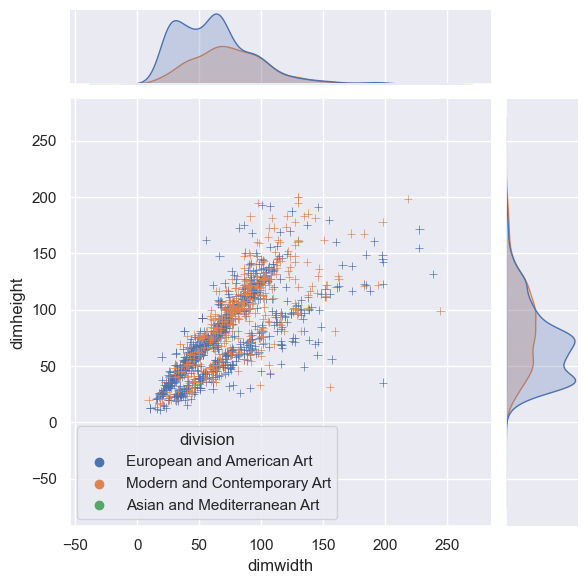

In [42]:
sns.jointplot(x="dimwidth", y="dimheight", hue="division", marker="+",
              data=sql^ "SELECT * FROM df4 WHERE medium = 'Oil on canvas'")

In [43]:
sql_val^ "SELECT url FROM df4 WHERE medium = 'Oil on canvas' LIMIT 1"

'https://www.harvardartmuseums.org/collections/object/175117'

In [44]:
sql_val^ "SELECT url FROM df4 WHERE technique = 'Gelatin silver print' LIMIT 1 OFFSET 100"

'https://www.harvardartmuseums.org/collections/object/159178'

In [45]:
sql_val^ "SELECT url FROM df4 WHERE medium = 'Bronze' LIMIT 1"

'https://www.harvardartmuseums.org/collections/object/226633'

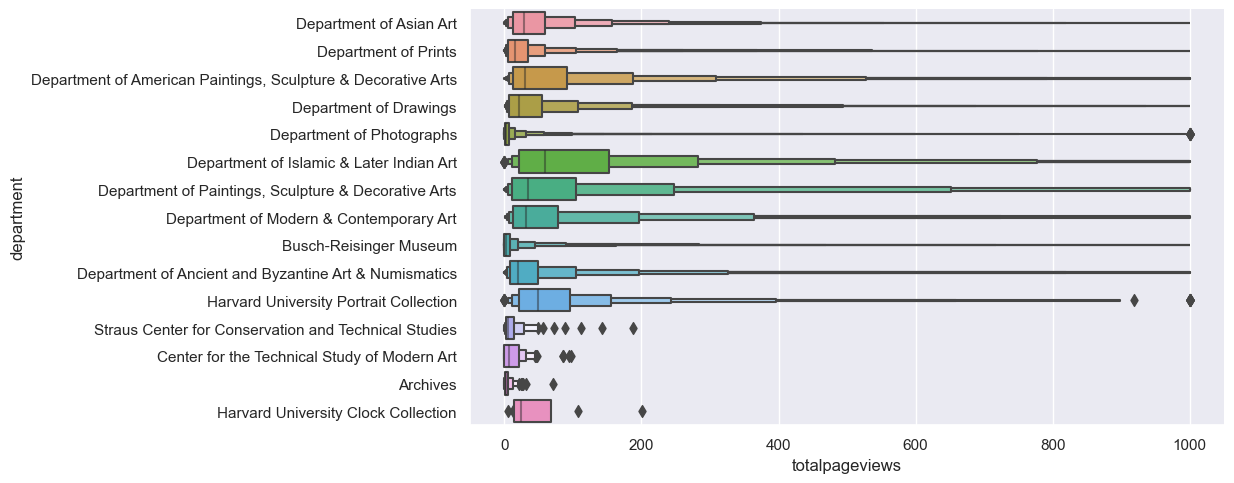

In [46]:
import numpy as np

sns.catplot(x="totalpageviews", y="department", kind="boxen",
            data=df4.assign(totalpageviews=np.minimum(df4.totalpageviews, 1000)), aspect=2.5) # type: ignore

In [47]:
sql^ """
    SELECT objectnumber, url, title, totalpageviews FROM df4
    ORDER BY totalpageviews DESC
    LIMIT 10
"""

,objectnumber,url,title,totalpageviews
0,2002.50.150,https://www.harvardartmuseums.org/collections/...,"Court of Gayumars (painting, recto; text, vers...",13593
1,1943.268,https://www.harvardartmuseums.org/collections/...,The Apparition,11176
2,1943.277,https://www.harvardartmuseums.org/collections/...,Spring Bouquet,11142
3,1924.27,https://www.harvardartmuseums.org/collections/...,Mystic Crucifixion,9710
4,1943.252,https://www.harvardartmuseums.org/collections/...,Raphael and the Fornarina,8060
5,2014.301,https://www.harvardartmuseums.org/collections/...,Grazing Horses IV,7911
6,1937.78,https://www.harvardartmuseums.org/collections/...,Summer Scene (Bathers),7707
7,1930.191,https://www.harvardartmuseums.org/collections/...,Portrait of an Old Man,7589
8,P12.C,https://www.harvardartmuseums.org/collections/...,"Head of One of Laocoön's Sons, after the Antique",7483
9,86.1995,https://www.harvardartmuseums.org/collections/...,Untitled (You construct intricate rituals whic...,6804


In [48]:
sql^ """
    SELECT objectnumber, url, title, totalpageviews FROM df4
    WHERE department LIKE '%Clock Collection'
    ORDER BY totalpageviews DESC
    LIMIT 10
"""

,objectnumber,url,title,totalpageviews
0,HUCL.20,https://www.harvardartmuseums.org/collections/...,Mantel Clock,201
1,HUCL.6,https://www.harvardartmuseums.org/collections/...,Banjo Wall Clock,108
2,HUCL.46,https://www.harvardartmuseums.org/collections/...,Banjo Regulator Clock,27
3,HUCL.18,https://www.harvardartmuseums.org/collections/...,Banjo Wall Clock,24
4,HUCL.27,https://www.harvardartmuseums.org/collections/...,Willard-Style Banjo Wall Clock,15
5,HUCL.28,https://www.harvardartmuseums.org/collections/...,Mantel Clock,12
6,HUCL.48,https://www.harvardartmuseums.org/collections/...,Wall Clock,5


In [49]:
sql^ """
    SELECT objectnumber, url, title, totalpageviews FROM df4
    WHERE department LIKE '%Photographs%' AND totalpageviews <= 50
    ORDER BY totalpageviews DESC
    LIMIT 10
"""

,objectnumber,url,title,totalpageviews
0,P1970.2303,https://www.harvardartmuseums.org/collections/...,Untitled (Hong Kong),50
1,P1970.3166,https://www.harvardartmuseums.org/collections/...,"Untitled (Mulhall family, sharecroppers, Ozark...",50
2,P1972.239,https://www.harvardartmuseums.org/collections/...,"Young Boy, Gondeville, France",50
3,P1972.104,https://www.harvardartmuseums.org/collections/...,"Church Organ, Alabama",50
4,P1981.24,https://www.harvardartmuseums.org/collections/...,Untitled (hermaphrodites),50
5,P1982.359.75,https://www.harvardartmuseums.org/collections/...,"Untitled (four photographs, Colonel Bathurst; ...",50
6,P1991.35,https://www.harvardartmuseums.org/collections/...,114. Girl Dressing Her Hair,50
7,P1992.19.4,https://www.harvardartmuseums.org/collections/...,"The View from the Roof of the Yungang Hotel, D...",50
8,P1995.46,https://www.harvardartmuseums.org/collections/...,Portait of John Cage,50
9,P1998.136,https://www.harvardartmuseums.org/collections/...,"Untitled (Ben Shahn, Jersey Homesteads)",50


In [50]:
import altair as alt

alt.Chart(
    sql^ """
    SELECT department, century, COUNT() AS count
    FROM df4
    WHERE century IS NOT NULL
    GROUP BY 1, 2
    HAVING count > 100
    """
).mark_bar().encode(
    x="count:Q",
    y="department:N",
    color="century:N",
)

alt.Chart(...)

In [51]:
import altair as alt

alt.Chart(
    sql^ """
    SELECT department, century, COUNT() AS count
    FROM df4
    WHERE century IS NOT NULL AND totalpageviews >= 100
    GROUP BY 1, 2
    HAVING count >= 5
    """
).mark_bar().encode(
    x="count:Q",
    y="department:N",
    color="century:N",
    tooltip=["century", "count"],
)

alt.Chart(...)

In [52]:
alt.Chart(
    sql^ """
    SELECT department, medium, COUNT() AS count
    FROM df4
    WHERE medium IS NOT NULL AND totalpageviews >= 50
    GROUP BY 1, 2
    HAVING count > 25
    """ # type: ignore
).mark_bar().encode(
    x="count:Q",
    y="department:N",
    color="medium:N",
    tooltip=["medium", "count"],
).properties(
    title="Artwork with at least 30 page views by medium and department",
) 

alt.Chart(...)

In [53]:
import altair as alt

alt.Chart(
    sql^ """
    SELECT department, technique, COUNT() AS count
    FROM df4
    WHERE technique IS NOT NULL AND totalpageviews >= 30
    GROUP BY 1, 2
    HAVING count > 25
    """  # type: ignore
).mark_bar().encode(
    x="count:Q",
    y="department:N",
    color="technique:N",
    tooltip=["technique", "count"],
)

alt.Chart(...)

In [54]:
len(df4)

125694

In [55]:
sql_val^ "SELECT COUNT() FROM df4 WHERE totalpageviews >= 30"

24533

In [56]:
df.people.map(len).value_counts()

1     109856
2       7437
0       7414
3       1569
4        205
5          9
8          2
6          2
7          2
10         1
9          1
15         1
Name: people, dtype: int64

In [57]:
sql_val^ "SELECT people FROM df WHERE LEN(people) >= 3 LIMIT 1"

[{'role': 'Artist',
  'birthplace': 'Dordrecht',
  'gender': 'unknown',
  'displaydate': '1650 - after 1707',
  'prefix': None,
  'culture': 'Dutch',
  'displayname': 'Justus de Gelder',
  'alphasort': 'Gelder, Justus de',
  'name': 'Justus de Gelder',
  'personid': 56344,
  'deathplace': 'Vianen (or Amsterdam?)',
  'displayorder': 1},
 {'role': 'Previous attribution',
  'birthplace': 'Leiden',
  'gender': 'male',
  'displaydate': '1606 - 1669',
  'prefix': 'Previously attributed to',
  'culture': 'Dutch',
  'displayname': 'Previously attributed to Rembrandt Harmensz. van Rijn',
  'alphasort': 'Rembrandt Harmensz. van Rijn',
  'name': 'Rembrandt Harmensz. van Rijn',
  'personid': 28241,
  'deathplace': 'Amsterdam',
  'displayorder': 2},
 {'role': 'Previous attribution',
  'birthplace': 'Dordrecht',
  'gender': 'male',
  'displaydate': '1634 - 1693',
  'prefix': 'Previously attributed to',
  'culture': 'Dutch',
  'displayname': 'Previously attributed to Nicolaes Maes',
  'alphasort': 'M

Our final, last two transformations will be to filter by `totalpageviews >= 30` then finally, to transform the `people` column into a simple flat list of ordinary string names.

In [58]:
dataset5 = []

for item in dataset4:
    if item.totalpageviews >= 30:
        # Fix None turning into float NaNs due to pandas
        new_item = Artwork(**{
            k: None if isinstance(v, float) and np.isnan(v) else v for k, v in item.__dict__.items()
        })  # type: ignore
        new_item.people = [person["name"] for person in new_item.people]
        dataset5.append(new_item)

len(dataset5)

24533

In [59]:
with open("../data/artmuseums-clean.json", "w") as f:
    json.dump([x.__dict__ for x in dataset5], f)